In [1]:
#Set the path to the hawkes library
import os 
import sys

module_dir = os.path.join("..", 'build') # path to the hawkes library and sometimes it's 'build\Debug' or 'build\Release' for windows    
sys.path.insert(0, module_dir)
try:
    import hawkes  # or any problematic import
except ImportError as e:
    print("ImportError:", e)
    print("  • Ensure cmake and pybind11 are installed.")
    print("  • if you are using windows, change the path to the hawkes library in the script: build --> build\\Debug or build\\Release.")

In [2]:
import hawkes
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.colors as mcolors
import time
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Hawkes Tests

In [3]:
def hex_to_rgb(value):
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    return [v/256 for v in value]


def get_continuous_cmap(hex_list, float_list=None):
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0, 1, len(rgb_list)))

    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [4]:
# Test the simulate_hawkes function
mu = np.array([2.0, 1.5, 0.01, 0.1, 0.8, 2.0, 0.3, 0.2, 0.5, 0.01])
alpha = np.array([
    [0.5, 0.1, 3.0, 2.0, 0.4, 2.4, 0.1, 1.5, 0.1, 0.1],
    [0.2, 0.6, 3.0, 0.1, 0.2, 0.1, 0.7, 1.2, 0.1, 0.5],
    [3.5, 3.0, 4.0, 3.0, 0.1, 2.0, 0.2, 1.3, 0.1, 2.0],
    [0.1, 0.2, 0.2, 0.5, 0.1, 0.1, 0.1, 0.2, 0.1, 2.0],
    [0.3, 0.1, 1.1, 1.0, 0.6, 0.8, 0.1, 1.5, 0.1, 0.1],
    [0.1, 0.2, 0.1, 0.1, 0.1, 0.4, 0.2, 0.1, 0.1, 3.],
    [0.1, 0.2, 2.0, 3.0, 0.5, 0.1, 0.3, 0.1, 0.5, 0.1],
    [3.0, 0.1, 0.3, 0.2, 0.4, 0.1, 0.1, 0.3, 0.6, 0.1],
    [0.1, 0.1, 0.1, 2.3, 0.1, 0.1, 3.0, 0.1, 0.1, 0.1],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0]
])
beta = 2*np.array([
    [5.0, 5.0, 5.0, 7.5, 4.0, 5.0, 0.5, 5.0, 5.0, 5.0],
    [4.5, 6.0, 7.5, 4.0, 5.0, 5.5, 5.0, 3.0, 5.0, 5.0],
    [5.0, 5.5, 6.0, 4.5, 6.5, 7.0, 4.0, 2.0, 5.0, 5.0],
    [1.0, 5.0, 2.5, 3.0, 4.5, 1.5, 1.0, 3.0, 5.0, 5.0],
    [0.5, 5.0, 2.0, 1.5, 5.0, 1.0, 1.5, 2.0, 5.0, 5.0],
    [4.5, 7.0, 7.5, 3.0, 6.0, 5.0, 6.5, 0.5, 5.0, 5.0],
    [4.0, 6.5, 8.0, 3.5, 5.0, 6.0, 5.5, 0.5, 5.0, 5.0],
    [4.5, 6.0, 8.5, 4.0, 5.5, 6.5, 6.0, 0.5, 5.0, 5.0],
    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
    [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
])
T = 1.0
nbThreads = 10
nbSimulations = 1000

result, jump_times = hawkes.SimulateHawkes(nbSimulations, nbThreads, mu, alpha, beta, T, True)

Simulation 1: 9 2 6 2 4 2 0 2 0 0 
Simulation 2: 1 4 0 0 3 1 1 2 0 0 
Simulation 3: 4 2 4 1 3 2 0 2 1 0 
Simulation 4: 6 1 5 0 6 2 1 0 1 0 
Simulation 5: 5 11 8 3 11 1 5 3 4 0 
Simulation 6: 3 3 5 0 4 2 3 4 2 0 
Simulation 7: 2 4 3 0 2 5 1 1 1 0 
Simulation 8: 5 2 0 1 3 2 0 1 1 0 
Simulation 9: 2 0 0 0 1 0 0 0 0 0 
Simulation 10: 12 10 17 1 14 2 2 13 1 0 
Simulation 11: 7 2 7 0 5 5 3 9 0 0 
Simulation 12: 1 2 0 0 2 5 0 1 1 0 
Simulation 13: 4 2 4 0 8 2 0 3 0 0 
Simulation 14: 5 4 4 0 1 3 0 2 1 0 
Simulation 15: 7 0 1 1 0 3 1 3 2 0 
Simulation 16: 13 12 10 2 5 5 3 1 1 0 
Simulation 17: 1 0 0 2 1 0 0 0 0 0 
Simulation 18: 6 1 2 1 1 2 2 1 1 0 
Simulation 19: 1 4 1 0 4 4 0 0 1 0 
Simulation 20: 8 13 15 3 9 4 2 1 4 0 
Simulation 21: 0 1 0 0 1 0 0 0 0 0 
Simulation 22: 7 4 4 0 2 3 3 3 2 0 
Simulation 23: 0 2 0 0 6 2 0 1 1 0 
Simulation 24: 1 0 3 1 0 0 2 0 2 0 
Simulation 25: 2 3 4 1 0 2 0 1 1 0 
Simulation 26: 6 2 4 0 3 1 2 4 1 0 
Simulation 27: 7 3 7 0 4 2 0 2 0 0 
Simulation 28: 4 1 2 0 5 

In [4]:
def plotHeatmap(ax=None):


    if ax is None:
        fig, ax = plt.subplots()
    else:
        ax = ax
    beta_heat = np.copy(beta)
    beta_heat[beta_heat == 0] = 1
    heat_matrix = alpha/beta_heat

    hex_list = ['#FF3333', '#FFFFFF', '#33FF49']

    ax = sns.heatmap(heat_matrix, cmap=get_continuous_cmap(hex_list), center=0, ax=ax, annot=True)

In [5]:
def intensity(timestamp, dim, simulation):
    jumps_d_t = np.array(np.extract(jump_times[simulation][dim] <timestamp*np.ones(result[simulation][dim]),  jump_times[simulation][dim]))
    return mu[dim] + np.sum(alpha[dim]*np.sum(np.exp(-beta[dim]*(timestamp - jumps_d_t[:, np.newaxis])), axis = 0))

def hawkesProcess(times, dim, simulation):
    N = np.zeros(len(times))
    itr = 0
    tau = jump_times[simulation][dim]
    for idx in range(1, len(times)):
        if itr < len(tau):
            if times[idx - 1] <= tau[itr] < times[idx]:
                N[idx] = N[idx - 1] + 1
                itr += 1
    return np.cumsum(N)

times = np.linspace(0, T, 1000)
def plotIntensity(dim, simulation):
    lam = [intensity(t, dim, simulation) for t in times]
    fig, axs = plt.subplots(2, figsize=(10, 5))
    
    # Plot intensity
    axs[0].plot(times, lam, 'b-')
    axs[0].set_title(f'$\\lambda_{{{dim}}}(t)$')
    axs[0].set_xlabel('$t$')
    axs[0].grid(True)
    
    # Plot vertical lines for jumps
    for jump_time in jump_times[simulation][dim]:
        axs[0].axvline(x=jump_time, color='r', linestyle='--', alpha=0.6)
        axs[0].text(jump_time, axs[0].get_ylim()[0]  - 0.15 * (axs[0].get_ylim()[1] - axs[0].get_ylim()[0]), f'{jump_time:.2f}', ha='center', va='top', fontsize=8, color='r')
    
    
    # Plot Hawkes process as a step function
    N = hawkesProcess(times, dim, simulation)
    axs[1].plot(times, N, drawstyle='steps-post', color='b')
    axs[1].set_title(f'$N^{{{dim}}}_t$')
    axs[1].set_xlabel('$t$')
    axs[1].grid(True)
    
    # Plot vertical lines for jumps
    for jump_time in jump_times[simulation][dim]:
        axs[1].axvline(x=jump_time, color='r', linestyle='--', alpha=0.6)
        axs[1].text(jump_time, axs[1].get_ylim()[0] - 0.15 * (axs[1].get_ylim()[1] - axs[1].get_ylim()[0]), f'{jump_time:.2f}', ha='center', va='top', fontsize=8, color='r')
       
    plt.tight_layout()
    plt.show()

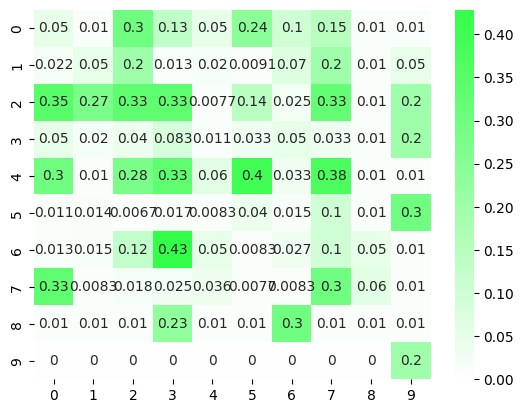

In [6]:
plotHeatmap()


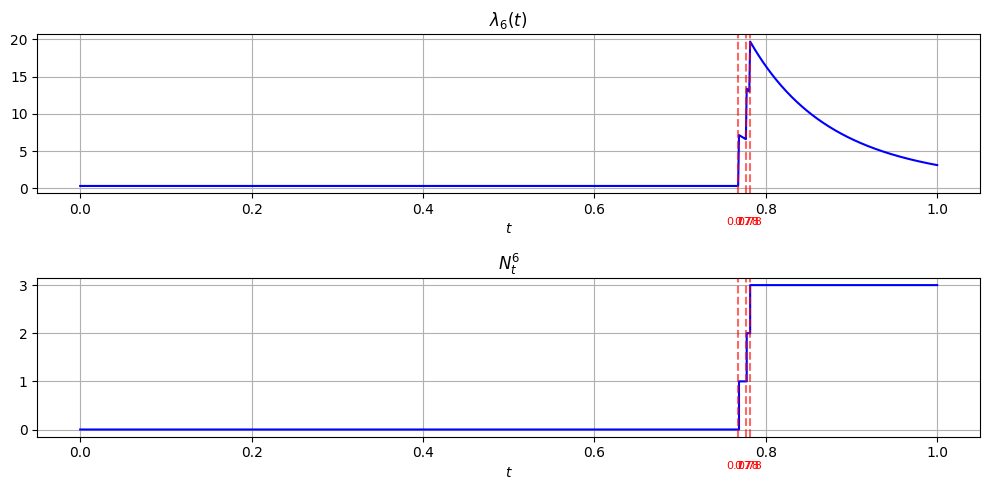

In [17]:
plotIntensity(6,22322)